In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import math
import scipy.optimize as optim
warnings.filterwarnings('ignore')

In [43]:
# import pliku
# plik został przeze mnie wyczyszczony ze zbędnych danych
data = pd.read_csv('https://raw.githubusercontent.com/xMackerel/Podstawy-Modelowania-i-Symulacji/main/rosja_covid.csv')


Text(0, 0.5, 'Infections')

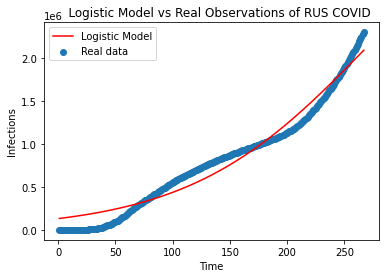

In [44]:
data = data['total_cases']
data = data.reset_index(drop=False)
data.columns = ['Timestep', 'Total Cases']

# funkcje logistyczne
def my_logistic(t, a, b, c):
  return c / (1 + a * np.exp(-b*t))
def my_logistic2(t):
  return c / (1 + a * np.exp(-b*t))

# losowa inicjalizacja parametrów a, b i c
p0 = np.random.exponential(size=3)

#ustawienie górnych i dolnych ograniczeć dla a, b i c
bounds = (0, [100000., 3., 1000000000.])

# dopasowanie krzywej
x = np.array(data['Timestep']) + 1
y = np.array(data['Total Cases'])
(a,b,c),cov = optim.curve_fit(my_logistic, x, y, bounds=bounds, p0=p0)

# wykreślenie funkcji w porównaniu z rzeczywistymi danymi
plt.scatter(x, y)
plt.plot(x, my_logistic2(x), color="red")
plt.title('    Logistic Model vs Real Observations of RUS COVID')
plt.legend(['Logistic Model', 'Real data'])
plt.xlabel('Time')
plt.ylabel('Infections')